# Análisis de componentes principales - Cancer Data

¡Hablemos de PCA! Dado que este no es exactamente un algoritmo completo de aprendizaje automático, sino un algoritmo de aprendizaje no supervisado, solo tendremos un ejemplo sobre este tema, pero no un proyecto completo de aprendizaje automático (aunque analizaremos el conjunto de cáncer con PCA).

## Revisión de PCA

Por ejemplo:

<img src='PCA.png' />

## Librerías

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## Los Datos

Trabajemos de nuevo con el conjunto de datos de cáncer, ya que tenía muchas características.

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
#(['DESCR', 'data', 'feature_names', 'target_names', 'target'])

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## PCA Visualización

Como hemos notado antes, es difícil visualizar datos de alta dimensión, podemos usar PCA para encontrar los primeros dos componentes principales y visualizar los datos en este nuevo espacio bidimensional, con un solo gráfico de dispersión. Sin embargo, antes de hacer esto, necesitaremos escalar nuestros datos para que cada característica tenga una variación de una sola unidad.

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [10]:
scaled_data = scaler.transform(df)

PCA con Scikit Learn utiliza un proceso muy similar a otras funciones de preprocesamiento que vienen con SciKit Learn. Instanciamos un objeto PCA, encontramos los componentes principales usando el método de ajuste, luego aplicamos la reducción de rotación y dimensionalidad llamando a transform().

También podemos especificar cuántos componentes queremos conservar al crear el objeto PCA.

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=2)

In [13]:
pca.fit(scaled_data)

PCA(n_components=2)

Ahora podemos transformar los datos a los componentes principales

In [14]:
x_pca = pca.transform(scaled_data)

In [15]:
scaled_data.shape

(569, 30)

In [16]:
x_pca.shape

(569, 2)

¡Listo! ¡Hemos reducido 30 dimensiones a solo 2! ¡Dibujemos estas dos dimensiones!

Text(0, 0.5, 'Segundo componente principal')

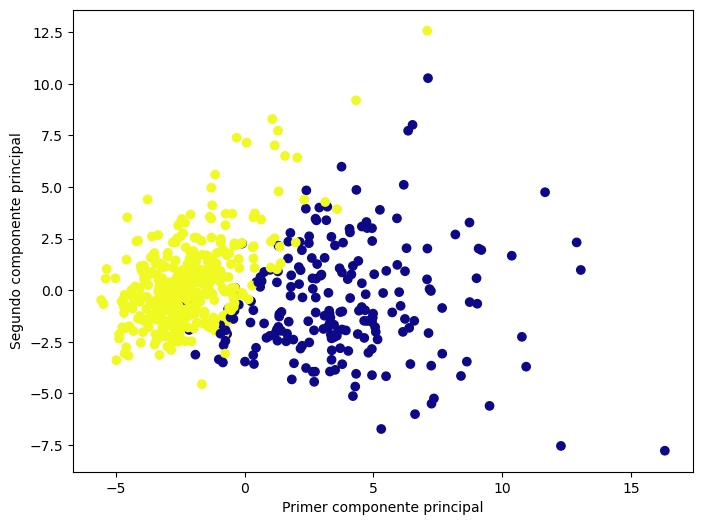

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente principal')

Claramente, al usar estos dos componentes, podemos separar fácilmente estas dos clases.

## Interpretando los componentes

Desafortunadamente, con este gran poder de reducción de dimensionalidad, viene el costo de poder entender fácilmente lo que representan estos componentes.

Los componentes corresponden a combinaciones de las características originales, los componentes mismos se almacenan como un atributo del objeto PCA ajustado:

In [18]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

En esta matriz de numpy, cada fila representa un componente principal y cada columna se relaciona con las características originales. Podemos ver esta relación con un mapa de calor:

*PCA.components_* : representan las direcciones de máxima variación en los datos. Es decir la correlación de los componentes con cada variable.

In [19]:
#factor del componente de cada variable:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

In [20]:
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


Este mapa de calor y la barra de colores representan básicamente la correlación entre las diversas características y el componente principal en sí.

<AxesSubplot:>

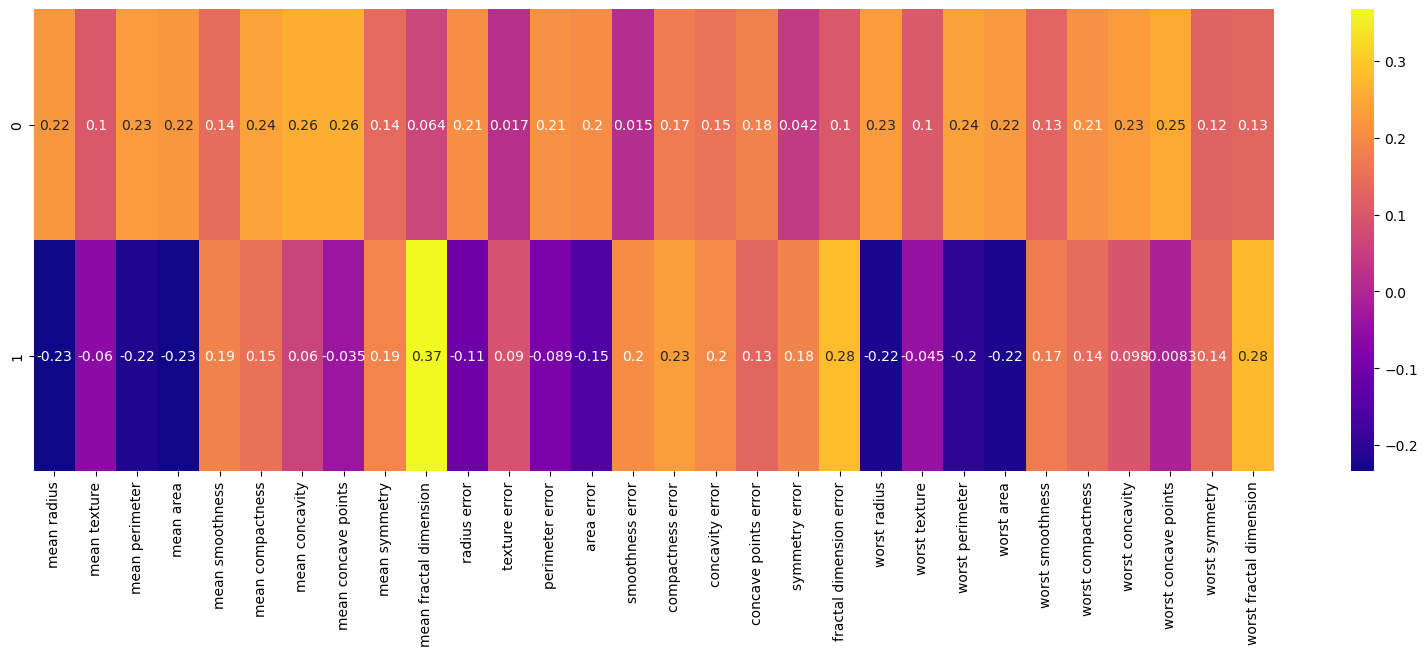

In [21]:
plt.figure(figsize=(20,6))
sns.heatmap(df_comp,cmap='plasma',annot=True)

# Varianza explicada por los componentes

In [22]:
pca30 = PCA(n_components=30)

In [23]:
pca30.fit(scaled_data)

PCA(n_components=30)

In [24]:
pca30.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [25]:
varianza_explicada = pd.DataFrame(pca30.explained_variance_ratio_,
                                  index=list(range(1,31)),
                                  columns=['ratio de varianza explicada'])
varianza_explicada.head()

,ratio de varianza explicada
1,0.442720
2,0.189712
3,0.093932
4,0.066021
5,0.054958


<AxesSubplot:>

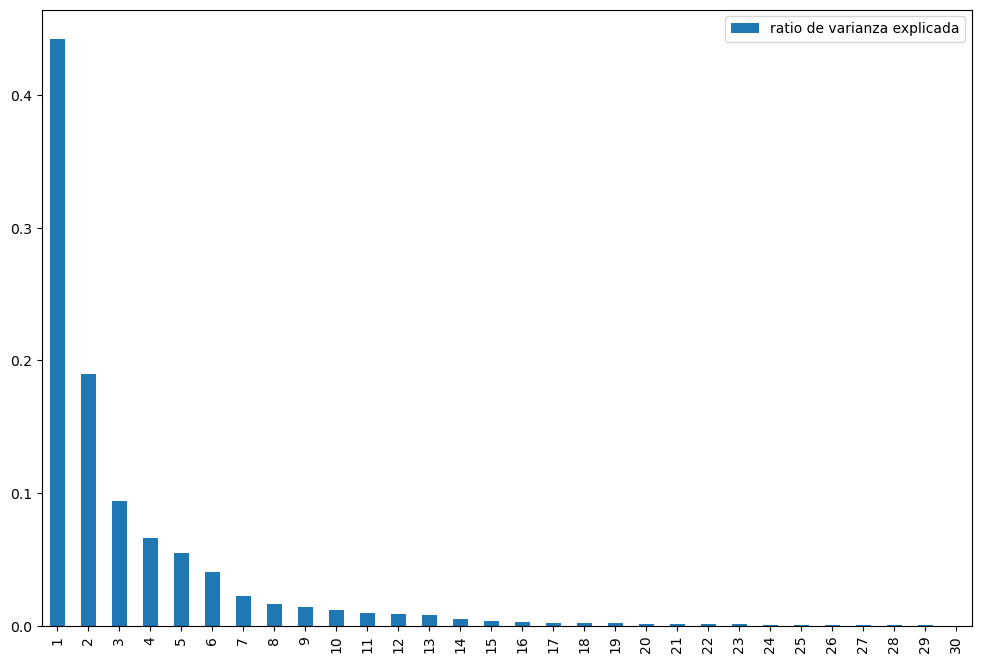

In [26]:
varianza_explicada.plot(kind='bar',figsize=(12,8))

In [27]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [28]:
sum(pca.explained_variance_ratio_)

0.6324320765155943

## División de Entrenamiento y Prueba de Datos

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
df['target'] = cancer['target']

In [31]:
X = df.drop('target', axis=1)
y = df['target']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Entrenamiento del clasificador de vectores de soporte

In [33]:
from sklearn.svm import SVC

In [34]:
model = SVC()

In [35]:
model.fit(X_train,y_train)

SVC()

## Predicciones y Evaluaciones

Ahora, hagamos unas predicciones con el modelo entrenado.

In [36]:
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(confusion_matrix(y_train,predictions_train))

[[118  28]
 [  5 247]]


In [39]:
print(confusion_matrix(y_test,predictions_test))

[[ 56  10]
 [  3 102]]


In [40]:
print(classification_report(y_train,predictions_train))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88       146
           1       0.90      0.98      0.94       252

    accuracy                           0.92       398
   macro avg       0.93      0.89      0.91       398
weighted avg       0.92      0.92      0.92       398



In [41]:
print(classification_report(y_test,predictions_test))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



# Probando con solo 2 variables (componentes principales)

In [42]:
x_pca_df = pd.DataFrame(x_pca,columns = ['componente 1','componente 2'])
x_pca_df['target'] = df['target']

In [43]:
X = x_pca_df.drop('target', axis=1)
y = x_pca_df['target']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [45]:
model = SVC()

In [46]:
model.fit(X_train,y_train)

SVC()

## Predicciones y Evaluaciones

Ahora, hagamos unas predicciones con el modelo entrenado.

In [47]:
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)

In [48]:
from sklearn.metrics import classification_report,confusion_matrix

In [49]:
print(confusion_matrix(y_train,predictions_train))

[[133  13]
 [  6 246]]


In [50]:
print(confusion_matrix(y_test,predictions_test))

[[ 56  10]
 [  5 100]]


In [51]:
print(classification_report(y_train,predictions_train))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       146
           1       0.95      0.98      0.96       252

    accuracy                           0.95       398
   macro avg       0.95      0.94      0.95       398
weighted avg       0.95      0.95      0.95       398



In [52]:
print(classification_report(y_test,predictions_test))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        66
           1       0.91      0.95      0.93       105

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.91       171
weighted avg       0.91      0.91      0.91       171



## Conclusión

¡Esperemos que esta información le sea útil cuando trabaje con datos de alta dimensión!